In [ ]:
import requests
import re
import json


In [ ]:

def get_lichess_game_pgn(game_url: str) -> str | None:
	"""
	Fetches the PGN of a Lichess game from its URL.

	Args:
		game_url: The full URL of the Lichess game.

	Returns:
		The PGN string if successful, otherwise None.
	"""
	# Extract the game ID from the URL (the 8 characters after the domain)
	match = re.search(r'lichess\.org/([a-zA-Z0-9]{8})', game_url)
	if not match:
		print("Error: Invalid Lichess game URL format.")
		return None

	game_id = match.group(1)

	# Construct the API URL for PGN export
	api_url = f"https://lichess.org/game/export/{game_id}"

	# Set headers to request PGN format
	headers = {"Accept": "application/x-pgn"}
	headers = {"Accept": "application/json"}
	# params = {'pgnInJson': True}
	print(api_url)
	try:
		response = requests.get(api_url, headers=headers,)# params=params)
		response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)
		return response
	except requests.exceptions.RequestException as e:
		print(f"Error fetching game data: {e}")
		return None


In [ ]:
url = "https://lichess.org/gyFeQsOE"
res = get_lichess_game_pgn(url)
print(res.content.decode('utf-8'))
# text = res.text
# pgn_data = res.json()
# pgn_data

In [1]:
from ludwig.chess.puzzle import ChessPuzzle
from pathlib import Path
import pandas as pd
from tqdm.notebook import tqdm
import json
from ludwig.util import repo_root
import chess
from stockfish import Stockfish
engine_path = Path(r'C:\Users\anwan\Downloads\stockfish-windows-x86-64\stockfish\stockfish-windows-x86-64.exe')
stockfish = Stockfish(path=engine_path)

In [2]:
task = ChessPuzzle()
task.prepare()
data = task.data
data.head()

,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags,SortKey
PuzzleId,,,,,,,,,,
tewjc,r5k1/pp3p1p/2b2qp1/3pr3/8/4P2P/R1PN1PP1/Q3K2R ...,a2a7 e5e3 f2e3 f6a1 a7a1 a8a1,1493,76,94,18768,crushing discoveredAttack long middlegame xRay...,https://lichess.org/SLbfzQtP#36,Polish_Opening Polish_Opening_Other_variations,1764192
0kDWS,1r6/1PN5/3p4/4kpp1/1R6/P3n3/K1P5/8 b - - 0 49,e3d5 b4b5 b8b7 b5b7,1947,75,95,13691,advantage endgame pin short,https://lichess.org/q2SFqfYD/black#97,NaN,1300645
f2p5F,5r2/p3R2p/4Q1p1/3B2k1/2p2b2/2P2P2/P5P1/1q3K2 w...,e6e1 b1d3 f1f2 d3d5,1385,75,96,16934,advantage endgame fork short,https://lichess.org/BTADpsgd#76,NaN,1625664
LDIfb,rnbqkb1r/pp2pp1p/3p1np1/2p5/4P3/2P2N1P/PP1PBPP...,f6e4 d1a4 b8c6 a4e4,1472,75,95,21527,advantage fork opening short,https://lichess.org/hnuvOm1w/black#9,Sicilian_Defense Sicilian_Defense_Modern_Varia...,2045065
mJDcO,5rk1/p1Q3pp/8/3p4/3q1r2/8/P1P3PP/R4R1K w - - 0 21,f1f4 d4a1 f4f1 a1f1,1321,76,95,17352,endgame hangingPiece mate mateIn2 short,https://lichess.org/oAkUCwh7#40,NaN,1648440


In [3]:
len(set(data.index))

1000

In [4]:
data['FEN'].iloc[0]

'r5k1/pp3p1p/2b2qp1/3pr3/8/4P2P/R1PN1PP1/Q3K2R w K - 0 19'

In [5]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# # show distribution of ratings
# plt.figure(figsize=(10, 6))
# sns.histplot(data['Rating'][:100], bins=30, kde=True)

In [6]:
fen = data['FEN'].iloc[0]

board = chess.Board(fen)

# use stockfish to get the best move
stockfish.set_fen_position(board.fen())
best_move = stockfish.get_best_move()

In [10]:
print(stockfish.get_board_visual(True))

+---+---+---+---+---+---+---+---+
| r |   |   |   |   |   | k |   | 8
+---+---+---+---+---+---+---+---+
| p | p |   |   |   | p |   | p | 7
+---+---+---+---+---+---+---+---+
|   |   | b |   |   | q | p |   | 6
+---+---+---+---+---+---+---+---+
|   |   |   | p | r |   |   |   | 5
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 4
+---+---+---+---+---+---+---+---+
|   |   |   |   | P |   |   | P | 3
+---+---+---+---+---+---+---+---+
| R |   | P | N |   | P | P |   | 2
+---+---+---+---+---+---+---+---+
| Q |   |   |   | K |   |   | R | 1
+---+---+---+---+---+---+---+---+
  a   b   c   d   e   f   g   h



In [11]:
best_move

'd2f3'

In [12]:
stockfish.get_evaluation()

{'type': 'cp', 'value': -66}

In [13]:
moves = stockfish.get_top_moves(50)
len(moves)

34

In [14]:
legal_moves = list(board.legal_moves)
len(legal_moves)

34

In [15]:
stockfish.info

'info depth 15 seldepth 30 multipv 1 score cp -82 wdl 0 727 273 nodes 124154 nps 255460 hashfull 41 tbhits 0 time 486 pv d2f3 e5f5 a1f6 f5f6 f3d4 b7b6 f2f3 a7a5 e1f2 c6b7 h1b1 b7a6 a2b2 a6c4 b2b6 f6b6 b1b6'

In [48]:
print(str(board))

r . . . . . k .
p p . . . p . p
. . b . . q p .
. . . p r . . .
. . . . . . . .
. . . . P . . P
R . P N . P P .
Q . . . K . . R


In [55]:
board.ascii()

AttributeError: 'Board' object has no attribute 'ascii'

In [15]:
print(board.unicode(borders=True))

  -----------------
8 |♜|⭘|⭘|⭘|⭘|⭘|♚|⭘|
  -----------------
7 |♟|♟|⭘|⭘|⭘|♟|⭘|♟|
  -----------------
6 |⭘|⭘|♝|⭘|⭘|♛|♟|⭘|
  -----------------
5 |⭘|⭘|⭘|♟|♜|⭘|⭘|⭘|
  -----------------
4 |⭘|⭘|⭘|⭘|⭘|⭘|⭘|⭘|
  -----------------
3 |⭘|⭘|⭘|⭘|♙|⭘|⭘|♙|
  -----------------
2 |♖|⭘|♙|♘|⭘|♙|♙|⭘|
  -----------------
1 |♕|⭘|⭘|⭘|♔|⭘|⭘|♖|
  -----------------
   a b c d e f g h


In [24]:
def board_to_text(board):
	"""
	Creates a text representation of the board with file and rank labels,
	using simple letters for pieces.
	"""
	s = "   a b c d e f g h\n"
	s += " +-----------------+\n"
	for rank in range(7, -1, -1):
		s += f"{rank + 1}|"
		for file in range(8):
			square = chess.square(file, rank)
			piece = board.piece_at(square)

			# The key is piece.symbol() which returns 'P', 'n', 'K', etc.
			symbol = piece.symbol() if piece else "."
			s += f" {symbol}"
		s += f" |{rank + 1}\n"
	s += " +-----------------+\n"
	s += "   a b c d e f g h\n"
	return s

In [26]:
print(board_to_text(board))

   a b c d e f g h
 +-----------------+
8| r . . . . . k . |8
7| p p . . . p . p |7
6| . . b . . q p . |6
5| . . . p r . . . |5
4| . . . . . . . . |4
3| . . . . P . . P |3
2| R . P N . P P . |2
1| Q . . . K . . R |1
 +-----------------+
   a b c d e f g h



In [42]:
depth = 18
# stockfish.depth = depth
stockfish.set_depth(depth)
# stockfish.info
# stockfish.get_parameters()

In [ ]:
analysis = {}
rerun = data.index.tolist()

In [40]:
todo = rerun

In [41]:
len(todo)

1

In [43]:

bad = []
for i in tqdm(todo):
	item = data.loc[i]
	try:
		fen = item['FEN']
		board = chess.Board(fen)
		moves = item['Moves'].split()
		first_move, answer, *other = moves
		board.push_san(first_move)

		stockfish.set_fen_position(board.fen())

		best = stockfish.get_best_move()
		if best != answer:
			bad.append(i)
			print(f"Game {i}: Best move: {best}, expected {answer}, url {item['GameUrl']}, moves {moves}")
			print(item)
			print()

		a = {'ID': i}

		value = stockfish.get_evaluation()
		a['score'] = value['value']

		a['white_view'] = stockfish.get_board_visual(True)
		a['black_view'] = stockfish.get_board_visual(False)

		a['moves'] = stockfish.get_top_moves(board.legal_moves.count())

		analysis[i] = a
	except KeyboardInterrupt:
		raise
	except Exception as e:
		print(f"Error processing game {i}: {e}")
		bad.append(i)
rerun = bad

  0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
# json.dump(analysis, repo_root().joinpath('assets', 'chess', f'analysis.json').open('w'), indent=2)

In [45]:
item

FEN                       8/1p6/4p3/p1k1B1P1/2b5/4KP2/8/8 b - - 2 52
Moves                                            c5d5 g5g6 d5e5 g6g7
Rating                                                          1595
RatingDeviation                                                   80
Popularity                                                        96
NbPlays                                                        17911
Themes             advancedPawn bishopEndgame crushing endgame sa...
GameUrl                       https://lichess.org/NiPQzKJ2/black#103
OpeningTags                                                      NaN
SortKey                                                      1719456
Name: OTEpS, dtype: object

In [55]:
# stockfish.depth = 15
stockfish.get_parameters()

{'Debug Log File': '',
 'Contempt': 0,
 'Min Split Depth': 0,
 'Ponder': 'false',
 'MultiPV': 1,
 'Skill Level': 20,
 'Move Overhead': 10,
 'Minimum Thinking Time': 20,
 'Slow Mover': 100,
 'UCI_Chess960': 'false',
 'UCI_LimitStrength': 'false',
 'UCI_Elo': 1350,
 'Threads': 1,
 'Hash': 16}

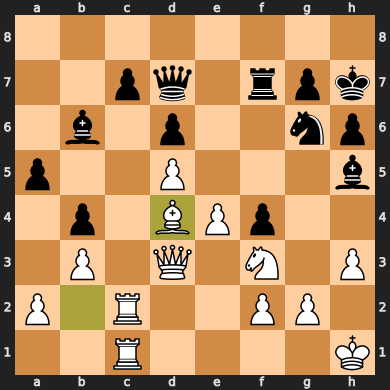

In [53]:
board

In [50]:
stockfish.get_top_moves(3)

[]

In [45]:
# stockfish.get_parameters()
stockfish.get_top_moves(board.legal_moves.count())

[]

In [60]:
stockfish.get_top_moves(2)

[]

In [57]:
answer

'h5f3'